1. Data Collection
2. Process data-Train and test split
3. Create an stacked LSTM model
4. Predict the test data and plot the output
5. Predict the future 30 Observations and plot the output

In [9]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("Data_only.csv")

In [3]:
df.head()

,Date,Requests
0,1998-1,137317594
1,1998-2,133211380
2,1998-3,149453070
3,1998-4,148053372
4,1998-5,153271739


In [4]:
df.tail()

,Date,Requests
235,2017-8,708718723
236,2017-9,686939308
237,2017-10,721874264
238,2017-11,728094596
239,2017-12,762851219


In [5]:
df1=df.reset_index()['Requests'] 

In [6]:
df1.head()

0    137317594
1    133211380
2    149453070
3    148053372
4    153271739
Name: Requests, dtype: int64

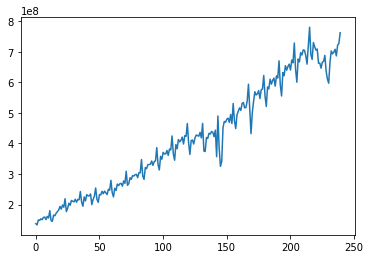

In [7]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [20]:
print(df1)

[[0.00634027]
 [0.        ]
 [0.02507827]
 [0.02291704]
 [0.03097455]
 [0.02643306]
 [0.0379377 ]
 [0.03979098]
 [0.02713994]
 [0.04333359]
 [0.03500856]
 [0.07192771]
 [0.02181532]
 [0.01823284]
 [0.04993546]
 [0.04636453]
 [0.05922923]
 [0.06734099]
 [0.0756811 ]
 [0.093364  ]
 [0.07979551]
 [0.10060193]
 [0.08955341]
 [0.13242617]
 [0.06739136]
 [0.0833704 ]
 [0.10980722]
 [0.09961484]
 [0.1239209 ]
 [0.11965403]
 [0.11673619]
 [0.12989825]
 [0.11497534]
 [0.12869608]
 [0.12722703]
 [0.1687771 ]
 [0.11495231]
 [0.09433438]
 [0.14149919]
 [0.12166148]
 [0.15312442]
 [0.14643325]
 [0.14720094]
 [0.15648725]
 [0.10288993]
 [0.12888126]
 [0.14493328]
 [0.1867009 ]
 [0.12993472]
 [0.11434619]
 [0.15316368]
 [0.15191567]
 [0.16985706]
 [0.1577564 ]
 [0.17108451]
 [0.16196309]
 [0.15356504]
 [0.18035077]
 [0.17538772]
 [0.22558166]
 [0.16308455]
 [0.14186983]
 [0.18528178]
 [0.17416629]
 [0.20637065]
 [0.1990209 ]
 [0.20826765]
 [0.21014827]
 [0.19614559]
 [0.22249499]
 [0.21026166]
 [0.27

In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(156, 84)

In [23]:
# convert an array of values into a dataset matrix
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [24]:
time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train.shape), print(y_train.shape)

(95, 60)
(95,)


(None, None)

In [26]:
print(X_test.shape), print(ytest.shape)

(23, 60)
(23,)


(None, None)

In [27]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [30]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [31]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(60,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 711ms/step - loss: 0.1551 - val_loss: 0.4898
Epoch 2/100
2/2 [==============================] - 0s 67ms/step - loss: 0.0781 - val_loss: 0.1984
Epoch 3/100
2/2 [==============================] - 0s 62ms/step - loss: 0.0215 - val_loss: 0.0112
Epoch 4/100
2/2 [==============================] - 0s 69ms/step - loss: 0.0084 - val_loss: 0.0159
Epoch 5/100
2/2 [==============================] - 0s 66ms/step - loss: 0.0233 - val_loss: 0.0037
Epoch 6/100
2/2 [==============================] - 0s 73ms/step - loss: 0.0072 - val_loss: 0.0370
Epoch 7/100
2/2 [==============================] - 0s 72ms/step - loss: 0.0036 - val_loss: 0.0863
Epoch 8/100
2/2 [==============================] - 0s 70ms/step - loss: 0.0075 - val_loss: 0.1096
Epoch 9/100
2/2 [==============================] - 0s 70ms/step - loss: 0.0099 - val_loss: 0.1036
Epoch 10/100
2/2 [==============================] - 0s 70ms/step - loss: 0.0082 - val_loss: 0.0781
Epoch 11/100
2/2 [

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

369621496.66498214

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

622713377.1589329

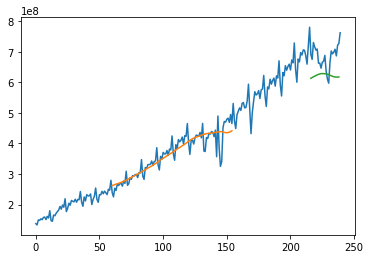

In [40]:
### Plotting 
# shift train predictions for plotting
look_back=60
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [45]:
len(test_data)

84

In [46]:
x_input=test_data[24:].reshape(1,-1)
x_input.shape

(1, 60)

In [47]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [74]:
# demonstrate prediction for next 8 Months
from numpy import array

lst_output=[]
n_steps=60
i=0
while(i<8):
    
    if(len(temp_input)>60):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} Month input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} Month output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 Month input [0.92274944 0.90074821 0.88410999 0.88980649 0.81793554 0.81874957
 0.79299243 0.82331202 0.82755951 0.8575143  0.77745741 0.73814347
 0.71692515 0.8214545  0.87994424 0.86520492 0.87389534 0.88862229
 0.8549934  0.90893534 0.91853995 0.97220653 0.75213593 0.75415367
 0.75534976 0.75554228 0.75475246 0.75309825 0.75073594 0.74782515
 0.74451208 0.74092311 0.73716086 0.73330742 0.72942531 0.72556102
 0.72174823 0.71801001 0.71436149 0.71081209 0.70736682 0.70402694
 0.70079225 0.6976611  0.69463027 0.69169694 0.68885672 0.68610644
 0.68344265 0.68086129 0.67835921 0.67593318 0.67358035 0.67129743
 0.66908216 0.66693187 0.66484433 0.66281682 0.66084731 0.65893412]
0 Month output [[0.65707546]]
1 Month input [0.90074821 0.88410999 0.88980649 0.81793554 0.81874957 0.79299243
 0.82331202 0.82755951 0.8575143  0.77745741 0.73814347 0.71692515
 0.8214545  0.87994424 0.86520492 0.87389534 0.88862229 0.8549934
 0.90893534 0.91853995 0.97220653 0.75213593 0.75415367 0.75534976
 0.7

In [75]:
day_new=np.arange(1,61)
day_pred=np.arange(61,69)

In [76]:
len(df1)

240

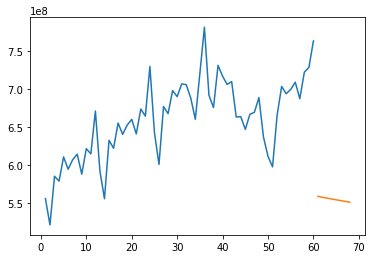

In [77]:
plt.plot(day_new,scaler.inverse_transform(df1[180:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [78]:
df3=df1.tolist()
df3.extend(lst_output)

In [79]:
len(df3)

248

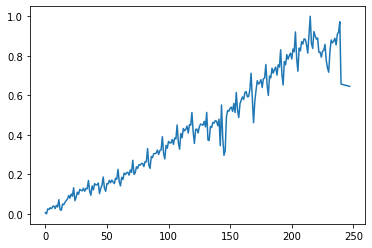

In [80]:
plt.plot(df3)